## Загрузка зависимостей

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn
!pip install imbalanced-learn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import re
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

## Загрузка датасета

In [3]:
# загрузка датасета
df = pd.read_csv("heart_attack_prediction_dataset.csv")

In [ ]:
df.info()

In [ ]:
# количество уникальных значений
df.nunique()

## Чистка и проверка

In [8]:
# удаляем столбец id пациентов
df = df.drop("Patient ID", axis=1)

In [ ]:
# разделим Blood Pressure на две колонки Systolic и Diastolic
df[['Systolic', 'Diastolic']] = df['Blood Pressure'] \
    .str.replace('"', '') \
    .str.split('/', expand=True)

# Преобразуем новые столбцы в числовой тип данных
df['Systolic'] = pd.to_numeric(df['Systolic'], errors='coerce')
df['Diastolic'] = pd.to_numeric(df['Diastolic'], errors='coerce')

# Вывод итогового DataFrame с новыми столбцами
print("датасет с разделёнными столбцами (Systolic и Diastolic):")
print(df.head())

In [ ]:
# удалим давление крови
df = df.drop("Blood Pressure", axis=1)

In [12]:
#удаляем так же Страну, Полушарие
df = df.drop("Country", axis=1)
df = df.drop("Continent", axis=1)

In [ ]:
# проверка на дубликаты
df.drop_duplicates()

In [ ]:
# проверка на пустые значения
df.isnull()

# Кодируем категориальные данные

In [19]:
# кодируем категориальные параметры
sex = LabelEncoder()
diet = LabelEncoder()
hemisphere = LabelEncoder()


df['Sex_Code'] = sex.fit_transform(df['Sex'])
df['Diet_Code'] = diet.fit_transform(df['Diet'])
df['Hemisphere_Code'] = hemisphere.fit_transform(df['Hemisphere'])

In [20]:
print("\nКодирование для Sex:")
for code, label in enumerate(sex.classes_):
    print(f"{label}: {code}")

print("\nКодирование для Diet:")
for code, label in enumerate(diet.classes_):
    print(f"{label}: {code}")

print("\nКодирование для Hemisphere:")
for code, label in enumerate(hemisphere.classes_):
    print(f"{label}: {code}")


Кодирование для Sex:
Female: 0
Male: 1

Кодирование для Diet:
Average: 0
Healthy: 1
Unhealthy: 2

Кодирование для Hemisphere:
Northern Hemisphere: 0
Southern Hemisphere: 1


## Анализ

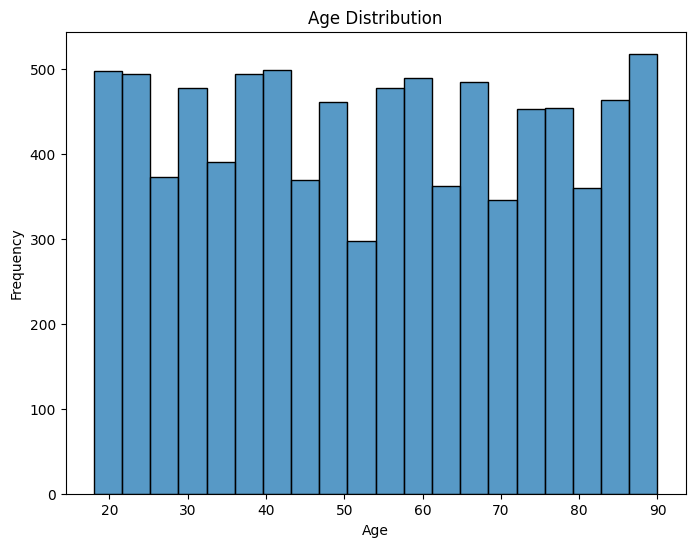

In [43]:
# Age распределение
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=False, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

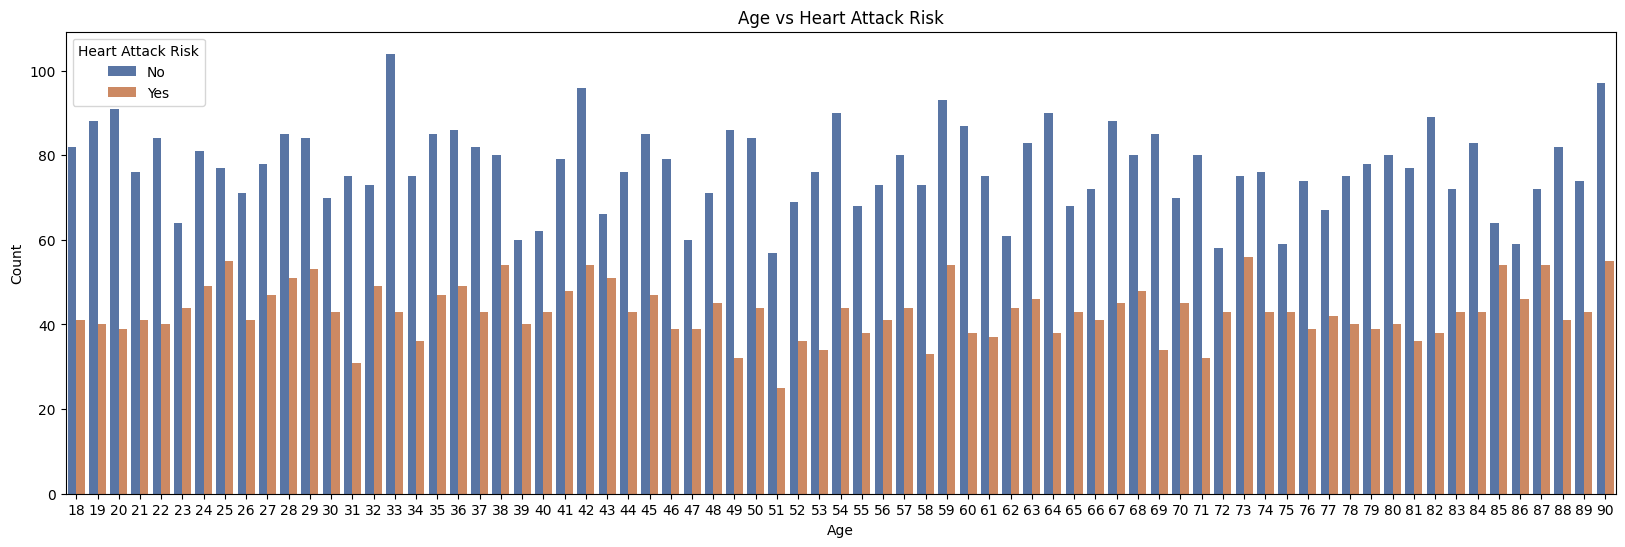

In [33]:
# Age и Heart Attack Risk
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='Age', hue='Heart Attack Risk', palette='deep')
plt.title('Age vs Heart Attack Risk')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Attack Risk', labels=['No', 'Yes'])
plt.show()


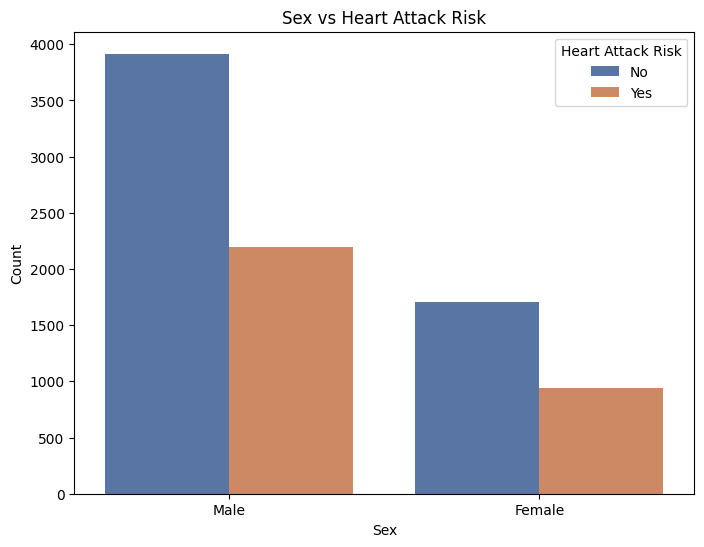

In [36]:
# по Sex 
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', hue='Heart Attack Risk', palette='deep')
plt.title('Sex vs Heart Attack Risk')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Heart Attack Risk', labels=['No', 'Yes'])
plt.show()

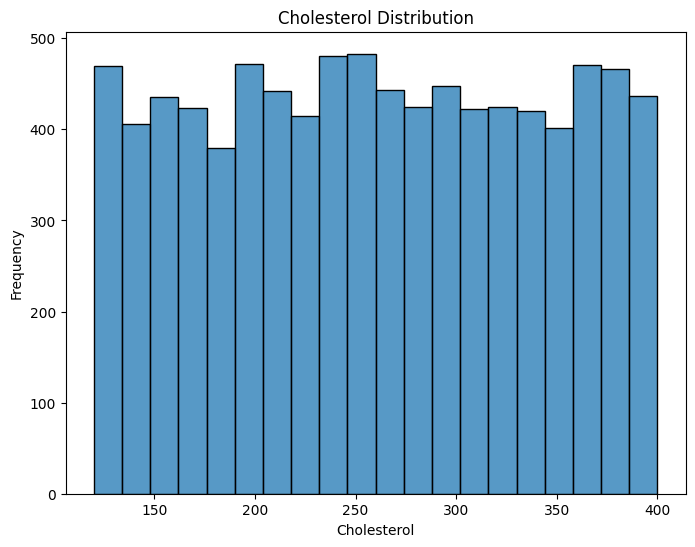

In [42]:
# Распределение Cholesterol
plt.figure(figsize=(8, 6))
sns.histplot(df['Cholesterol'], kde=False, bins=20)
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Cholesterol', ylabel='Count'>

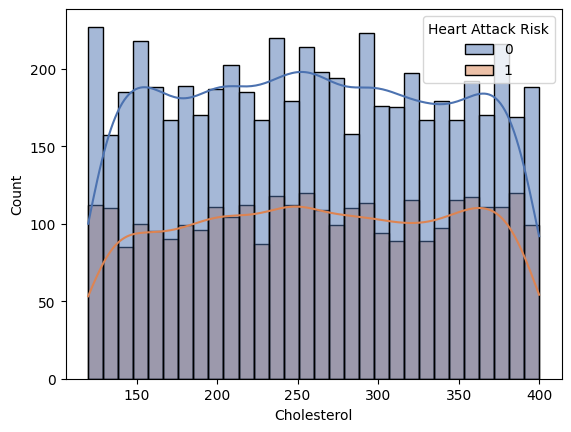

In [45]:
# Cholesterol и Heart Attack
sns.histplot(data=df, x='Cholesterol', hue='Heart Attack Risk', kde=True, palette='deep', bins=30)

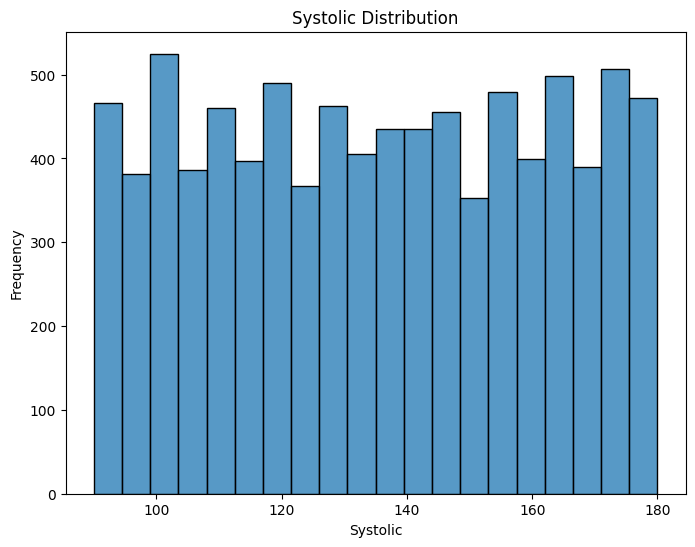

In [51]:
# систолическое давление
plt.figure(figsize=(8, 6))
sns.histplot(df['Systolic'], kde=False, bins=20)
plt.title('Systolic Distribution')
plt.xlabel('Systolic')
plt.ylabel('Frequency')
plt.show()

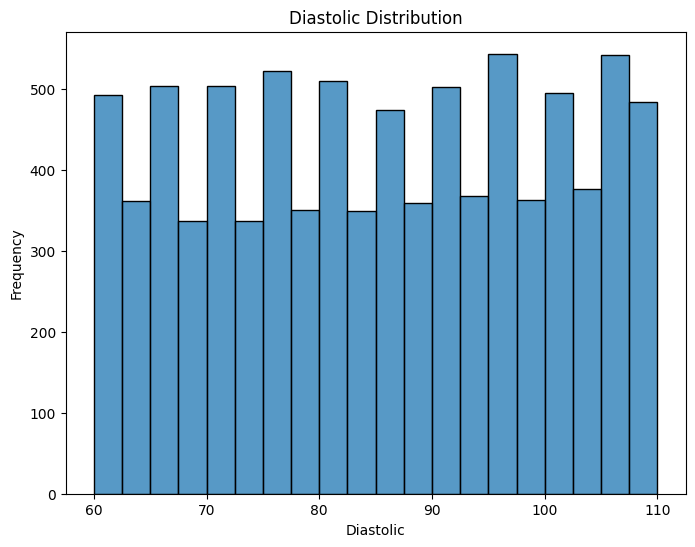

In [50]:
#диастолическое давление
plt.figure(figsize=(8, 6))
sns.histplot(df['Diastolic'], kde=False, bins=20)
plt.title('Diastolic Distribution')
plt.xlabel('Diastolic')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_38347/3255965824.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Heart Attack Risk', y=ration, palette='deep')


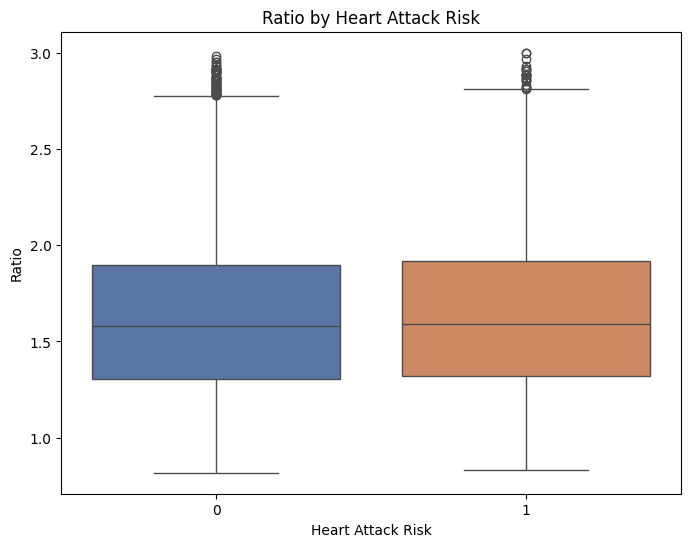

In [53]:
# распределение кровяного давления
ratio = df['Systolic'] / df['Diastolic']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Heart Attack Risk', y=ration, palette='deep')

plt.title('Ratio by Heart Attack Risk')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Ratio')
plt.show()

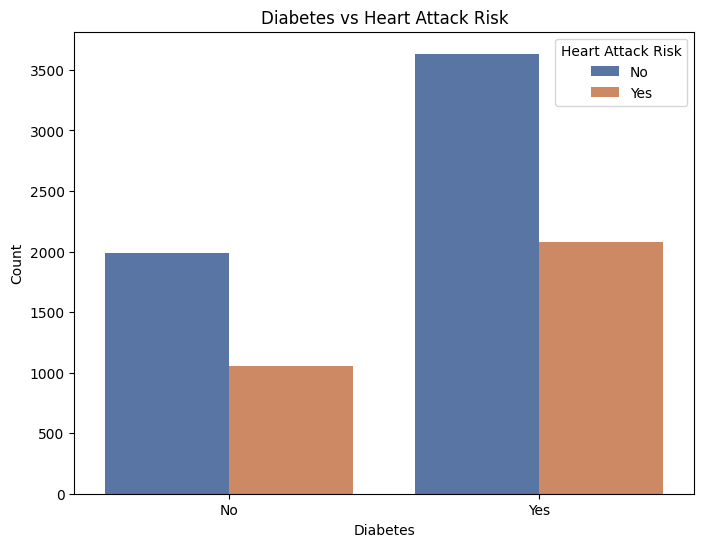

In [54]:
# Распределение Diabet и Heart Attack
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Diabetes', hue='Heart Attack Risk', palette='deep')

plt.title('Diabetes vs Heart Attack Risk')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Heart Attack Risk', labels=['No', 'Yes'])
plt.show()

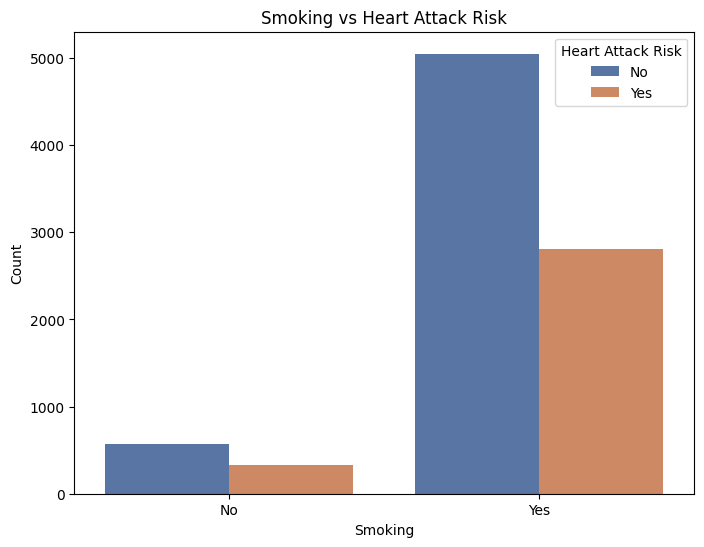

In [55]:
# курение
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Smoking', hue='Heart Attack Risk', palette='deep')

# Labels and title
plt.title('Smoking vs Heart Attack Risk')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  
plt.legend(title='Heart Attack Risk', labels=['No', 'Yes'])
plt.show()

/tmp/ipykernel_38347/522285361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Alcohol Consumption', palette='deep')


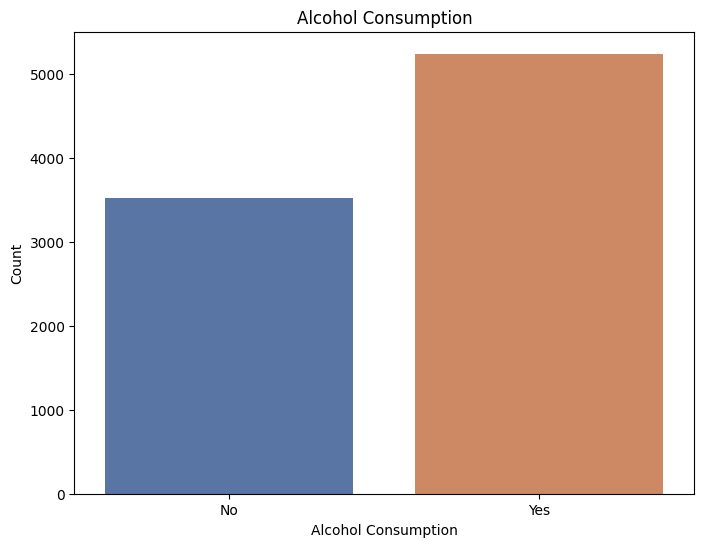

In [58]:
# алкоголь
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Alcohol Consumption', palette='deep')

# Labels and title
plt.title('Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  
plt.show()